## **演示0302：概率模型及其分布**

### **基本概念**
* **随机试验(random experiment)**：在相同条件下对某随机现象进行的大量重复观测
 * 例如：抛硬币、丢骰子等
* **随机事件(random event)**：在随机试验中，可能出现也可能不出现，而在大量重复试验中具有某种规律性的事件
 * 例如：抛硬币扔出的结果是正面，丢骰子扔出的的结果是5点等
* **概率**：表示在某些给定条件下，随机事件$A$发生的可能性，记为：$P(A)$
* 随机变量(random variable)：表示随机试验各种结果的实值单值函数。它是从样本空间的子集到实数的映射，将事件转换成一个数值，从而便于数学运算
 * 例如：使用变量来表示抛硬币的结果，如果是正面，则用1表示，概率记为$P(A=1)$，或$P(A_1)$；如果是背面，则用0表示，概率记为$P(A=0)$，或$P(A_0)$
 * 又如：使用变量来表示丢骰子的结果，各种结果的概率可分别表示为：$P(A=1),P(A=2),P(A=3),P(A=4),P(A=5),P(A=6)$
* 随机变量的类型：
 * **离散型随机变量(discrete random variable)**：取值是可数个值的随机变量。例如，表示抛硬币、丢骰子的随机标量
 * **连续型随机变量(continuous random variable)**：取值是一个区间中的任意一点(也就是不可数)的随机变量，比如人的身高、商品价格等
* **概率质量函数(Probability Mass Function, PMF)**：离散型随机变量在各特定取值上的概率，其值本身就是概率
* **概率密度函数(Probability Density Function, PDF)**：连续型随机变量在某个确定的取值点附近的可能性，但是：
 * PDF本身并不是概率值，而是需要在一定区间积分后才是概率值
 * 连续型随机变量在某个点的概率为0(虽然其PDF值并不为0)
* **累积分布函数(Cumulative Distribution Function, CDF)**
 * 反映了随机变量到当前指定值为止的所有概率之和。其值域为$[0,1]$
 * 对于连续型随机变量：$ CDF(x) = \sum_{t=-\infty}^{x}PDF(t)dt $
 * 对于离散型随机变量：$ CDF(x) = \sum_{k=1}^{x}PMF(k) $

### **案例1：离散型随机变量的概率分布**

>**0-1分布**  
* 某个事件只有两种结果：发生或不发生，而且该事件每次发生的概率都是$p$
* 伯努利实验：在同样的条件下，重复、独立的进行的随机实验；实验只有两种结果。0-1分布就是对伯努利实验的描述
* 概率质量函数：$ P(x_k)=p^k (1-p)^{(1-k)} $，其中，$k=0或1$，$x_0$表示该事件不发生的情形，$x_1$表示该事件发生的情形
* 以丢硬币为例，扔出结果为正面(可视为：事件发生)的概率为$p=50\%$，扔出结果为背面(可视为：事件不发生)的概率为：$p=50\%$；各次试验是独立的伯努利实验

> **几何分布**
* 在$n$次伯努利实验中，实验$k$次才得到第一次成功的机率，即：前$k-1$次都失败，第$k$次成功的概率
* 概率质量函数：$ P(x_k)=(1-p)^{(k-1)} \cdot p $，其中，$p$是单次实验中，发生该事件的概率
* 仍以丢硬币为例，假设要计算丢3次硬币才得到1次正面结果的概率，则为：$P(x_3)=(1-p)^{(3-1)} \cdot p=(1-0.5)^2*0.5=0.125$

>**二项分布**
* 重复$n$次伯努利实验，在$n$次实验中，发生$k$次事件的概率
* 概率质量函数：$ P(x_k)=C_n^k p^k (1-p)^{(n-k)} $，其中，$p$是单次实验中，发生该事件的概率。$ C_n^k=\dfrac{(P_n^k)}{k!}=\dfrac{n!}{k!(n-k)!} $
* 仍以丢硬币为例，假设要计算扔10($n$)次硬币，其中5($k$)次为正面的概率，则为：$ P(x_5)=C_{10}^5 * p^5 * (1-0.5)^{(10-5)} = \dfrac{10!}{5!*(10-5)!}*0.5^5*0.5^5=0.246$
* *scipy.stats.binom.pmf(k, n, p)*方法提供了计算二项分布概率的实现。上面的例子可以写为：

In [1]:
''' 使用scipy.stats.binom.pmf计算二项分布的概率 '''

import numpy as np
import scipy.stats as sps

n = 10
p = 0.5
k = 5
print(sps.binom.pmf(k, n, p))

0.24609375000000025


>**二项分布的另一个例子**
假设某人投篮命中率为0.3，总共投篮10次，问至少投中2次的概率？  
* 分析：每次投篮有2种结果，投中或未中；每次投中概率相同(0.3)，每次投篮可认为独立事件。因此符合二项分布
* 至少投中2次的概率：$ P(x \geq 2)=P(x_2)+P(x_3)+P(x_4)+\cdots+P(x_{10}) $
* 计算方法如下：

In [2]:
''' 使用scipy.stats.binom.pmf计算二项分布的概率 '''

n = 10
p = 0.3
k = np.arange(n+1)
p_series = sps.binom.pmf(k, n, p)
print(sum(p_series[2:]))

0.8506916540999998


>**泊松分布**
* 日常生活中，大量事件是有固定频率的，比如：
 * 某医院平均每小时出生3个婴儿
 * 某网站平均每分钟有2次访问
 * 某超市平均每小时销售4包奶粉等  
* 它们的特点是，我们可以预估这些事件的总数，但是没法知道具体的发生时间。例如：平均每小时出生3个婴儿，但无法准确得知下一个小时会出生几个。泊松分布就是描述某段时间内，事件具体的发生概率
* 概率质量函数：$ P(N(t)=n)=\dfrac{(\lambda t)^n e^{-\lambda t}}{n!} $
 * $N$表示某种函数关系，$t$表示时间(为单位时间的倍数)，$\lambda$表示事件的平均频率(已知)，$n$表示待计算的事件次数。
 * 例如，如果平均每小时出生3个婴儿，则$\lambda=3$，以1小时为单位时间。
* 泊松分布示例：
 * 计算：1小时出生3个婴儿的概率。此时，$n=3,t=1,P(N(1)=3)=\dfrac{(3 \cdot 1)^3 e^{-3 \cdot 1}}{3!}\approx 0.224$
 * 计算：接下来2个小时，一个婴儿都不出生的概率。此时，$n=0,t=2, P(N(2)=0)=\dfrac{(3 \cdot 2)^0 e^{(-3 \cdot 2)}}{0!} \approx 0.0025$
 * 计算：接下来1个小时，至少出生2个婴儿的概率。$P(N(1) \ge 2)=1-P(N(1)=0) - P(N(1)=1) = 0.8 $

### **案例2：连续型随机变量的概率分布**

>**均匀分布**
* 该随机变量所有可能值的出现概率相同。
* 概率密度函数： $ PDF(x)=\dfrac{1}{b-a},(a \leq x \leq b) $，假设该随机变量的取值范围在$[a, b]$区间
* 累积分布函数：$ CDF(x)=
\left\{
\begin{aligned}
&\dfrac{x-a}{b-a},& (a \leq x \leq b) \\
&0, & (x \lt a) \\
&1, & (x \gt b)
\end{aligned}
\right. $

>**指数分布**
* 泊松分布是单位时间内独立事件发生次数的概率分布，指数分布是独立事件的时间间隔的概率分布，或者说某个事件在时间($x$)内发生的概率
* 概率密度函数： $ PDF(x)=\lambda e^{-\lambda x},(x>0) $。其中，$\lambda$称为率参数(rate parameter)，即单位时间内发生事件的次数（频率）
 * 另一种写法：$ PDF(x)=\dfrac{1}{\theta} e^{\frac{-x}{\theta}}, (x>0) $。其中，$ \theta=\frac{1}{\lambda} $
* 累积分布函数：$ CDF(x)=1-e^{-\lambda x} $。注意，该函数是概率密度函数的积分
* 指数分布示例
 * 之前泊松分布中的例子，假设平均每小时出生3个婴儿($\lambda=3$)，并且刚才过去的那个小时正好已经生了3个婴儿，那么接下来的15分钟，有婴儿出生的概率是多少？
 * 以小时为单位，15分钟为0.25小时，使用累积分布函数来计算0~0.25小时区间内事件出现的概率：$ CDF(0.25)=1-e^{-\lambda x}=1-e^{-3 \cdot 0.25} \approx 0.53 $

>**正态分布**
* 正态分布又叫高斯分布。对于服从$N(\mu,\sigma^2)$的正态分布，$\mu$决定了正态分布中心线的位置，$\sigma$决定了它的幅度。
* 概率密度函数：$ PDF(x)=\dfrac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}} $
 * *scipy.stats.norm.pdf(x, mu, sigma)*方法提供了计算正态分布概率密度函数的实现
* 标准正态分布：$\mu=0,\sigma^2=1$时，被称为标准正态分布。此时：
 * 函数曲线下68.268949%的面积在平均值左右的一个标准差范围内
 * 95.449974%的面积在平均值左右两个标准差2σ的范围内
 * 99.730020%的面积在平均值左右三个标准差3σ的范围内
 * 99.993666%的面积在平均值左右四个标准差4σ的范围内
* 累积分布函数：$ CDF(x)= \frac{1}{\sigma \sqrt{2\pi}} \int_{-\infty}^{x} e^{-\frac{(x-\mu)^2}{2\sigma^2}}dx $

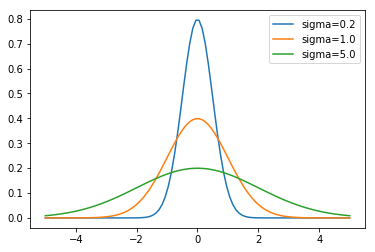

In [3]:
''' 观察正态分布下，不同sigma值对幅度的影响 '''

%matplotlib inline
import scipy.stats as sps
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 100)
mu = 0
for sigma in [0.5, 1.0, 2.0]:
    y = sps.norm.pdf(x, mu, sigma)
    plt.plot(x, y)
    
labels = ['sigma=0.2', 'sigma=1.0', 'sigma=5.0']
plt.legend(labels)
plt.show()

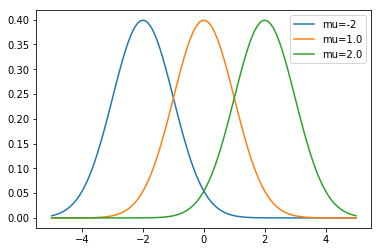

In [4]:
''' 观察正态分布下，不同mu值对中心线位置的影响 '''

%matplotlib inline
import scipy.stats as sps
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 100)
sigma = 1.0
for mu in [-2.0, 0, 2.0]:
    y = sps.norm.pdf(x, mu, sigma)
    plt.plot(x, y)
    
labels = ['mu=-2', 'mu=1.0', 'mu=2.0']
plt.legend(labels)
plt.show()

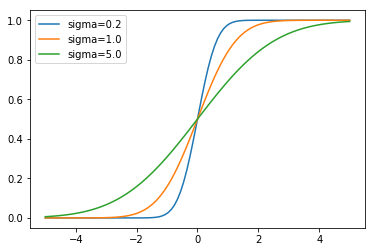

In [5]:
''' 观察正态分布下，不同sigma值对累积分布函数的影响 '''

%matplotlib inline
import scipy.stats as sps
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 100)
mu = 0
for sigma in [0.5, 1.0, 2.0]:
    y = sps.norm.cdf(x, mu, sigma)
    plt.plot(x, y)
    
labels = ['sigma=0.2', 'sigma=1.0', 'sigma=5.0']
plt.legend(labels)
plt.show()